In [12]:
import pandas as pd
from pathlib import Path
from association_measures import frequencies
from association_measures import measures as am
from source.utils import print_md_table, corners

ucs_df_dir = Path('/share/compling/projects/sanpi/results/ucs_tables/dataframes')
adv_adj_am_path = ucs_df_dir.joinpath('adv_adj/extra/all_adj-x-adv_frq-thr0-001p.35f=868+_min15x.rsort-view_extra.pkl.gz')
loaded_df = pd.read_pickle(adv_adj_am_path)
corners(loaded_df,4)

columns,l1,l2,f,E11,...,ipm_expected,unexpected_count,unexpected_ratio,joint_probability
rows,,,,,,,,,
0,far,away,1284,6.811065,...,15.501113,1277.188965,0.994695,0.002891
1,bone,marrow,1147,0.019452,...,14.024245,1146.980591,0.999983,0.812094
2,well,intentioned,1786,4.235648,...,23.401758,1781.764404,0.997628,0.009019
3,most,wanted,3371,310.443237,...,0.135252,3060.556641,0.907908,0.000399
...,...,...,...,...,...,...,...,...,...
181134,very,enough,18,53640.914062,...,0.826625,-53622.914062,-2979.050781,0.000735
181135,very,available,403,102716.992188,...,4.162803,-102313.992188,-253.880875,0.001404
181136,very,better,93,88168.882812,...,3.619227,-88075.882812,-947.05249,0.00121
181137,very,more,69,122379.859375,...,0.447158,-122310.859375,-1772.621094,0.001687


In [13]:
amdf = loaded_df.rename(columns={'l1':'adv', 'l2':'adj'}).filter(regex=r'^[^r][^_]|^\w$')
corners(amdf)

columns,adv,adj,f,E11,am_log_likelihood,...,ipm_reference,ipm_expected,unexpected_count,unexpected_ratio,joint_probability
rows,,,,,,,,,,,
0,far,away,1284,6.811065,13385.0,...,0.084495,15.501113,1277.188965,0.994695,0.002891
1,bone,marrow,1147,0.019452,26482.132812,...,0.252152,14.024245,1146.980591,0.999983,0.812094
2,well,intentioned,1786,4.235648,20799.308594,...,1.961413,23.401758,1781.764404,0.997628,0.009019
3,most,wanted,3371,310.443237,15699.700195,...,0.59433,0.135252,3060.556641,0.907908,0.000399
4,legally,binding,2438,1.245322,35625.136719,...,4.432571,33.703815,2436.754639,0.999489,0.057278
...,...,...,...,...,...,...,...,...,...,...,...
181133,very,greater,23,18363.53125,-38782.8125,...,2102.359131,0.467961,-18340.53125,-797.414429,0.00025
181134,very,enough,18,53640.914062,-114225.429688,...,6141.780273,0.826625,-53622.914062,-2979.050781,0.000735
181135,very,available,403,102716.992188,-214560.203125,...,11755.871094,4.162803,-102313.992188,-253.880875,0.001404


In [14]:
amdf.nlargest(20, columns=['am_log_likelihood'])

,adv,adj,f,E11,am_log_likelihood,am_log_likelihood_tt,am_odds_ratio_disc,am_Dice,am_t_score,am_p1_given2,...,log_ratio,conservative_log_ratio,mutual_information,local_mutual_information,ipm,ipm_reference,ipm_expected,unexpected_count,unexpected_ratio,joint_probability
198,so,many,1191864,152233.906250,3.693492e+06,3.693492e+06,1.294639,0.299978,952.281799,0.483162,...,3.983730,3.972379,4.368221,5.206325e+06,207787.921875,13134.033203,8.900199,1.039630e+06,0.872272,0.094049
163,not,sure,467213,44752.878906,1.669603e+06,1.669603e+06,1.391726,0.177653,618.056641,0.505630,...,4.468787,4.450370,4.048832,1.891667e+06,105805.195312,4778.241211,9.455302,4.224601e+05,0.904213,0.051082
771,too,much,583184,75900.226562,1.613904e+06,1.613904e+06,1.110571,0.218652,664.275391,0.291708,...,3.452690,3.439242,4.154428,2.422796e+06,163933.609375,14972.863281,11.487893,5.072838e+05,0.869852,0.043453
595,much,more,355655,24525.865234,1.424388e+06,1.424388e+06,1.417348,0.235935,555.242798,0.326094,...,4.435738,4.418284,4.071719,1.448127e+06,179015.453125,8271.804688,15.176493,3.311291e+05,0.931040,0.055678
409,much,better,295224,17669.722656,1.273191e+06,1.273191e+06,1.500725,0.216484,510.824951,0.378071,...,4.761141,4.741165,3.954181,1.167369e+06,148598.093750,5479.828613,16.513239,2.775543e+05,0.940148,0.054109
814,so,much,614652,122380.406250,1.210767e+06,1.210767e+06,0.896955,0.163626,627.899475,0.283075,...,2.837883,2.824608,5.091457,3.129474e+06,107157.578125,14987.702148,0.868092,4.922716e+05,0.800895,0.026091
43,most,recent,313185,36520.792969,1.106216e+06,1.106216e+06,1.565994,0.078584,494.370453,0.691796,...,5.142850,5.110905,4.527896,1.418069e+06,41378.355469,1171.173218,1.227091,2.766642e+05,0.883389,0.027815
959,most,important,748533,199883.921875,1.091952e+06,1.091952e+06,0.749549,0.153258,634.145874,0.256215,...,2.367626,2.355649,4.171259,3.122325e+06,98897.023438,19162.699219,6.666907,5.486491e+05,0.732966,0.020429
441,more,likely,498401,117330.546875,8.807198e+05,8.807198e+05,0.877424,0.096130,539.778809,0.368124,...,2.846227,2.829771,4.744763,2.364795e+06,53470.781250,7435.615234,0.962395,3.810704e+05,0.764586,0.016947
358,most,popular,398955,75212.328125,8.645952e+05,8.645952e+05,0.990027,0.095030,512.552063,0.395105,...,3.218866,3.200356,4.232111,1.688422e+06,52710.386719,5661.361816,3.088764,3.237427e+05,0.811477,0.018589


In [15]:
amdf.nlargest(200, columns=['am_odds_ratio_disc']).tail(40)

,adv,adj,f,E11,am_log_likelihood,am_log_likelihood_tt,am_odds_ratio_disc,am_Dice,am_t_score,am_p1_given2,...,log_ratio,conservative_log_ratio,mutual_information,local_mutual_information,ipm,ipm_reference,ipm_expected,unexpected_count,unexpected_ratio,joint_probability
16168,north,eastern,67,0.031003,901.624146,901.624146,3.381236,0.035676,8.181565,0.023499,...,11.111842,9.926602,3.334665,223.422562,73951.437500,33.416008,34.220116,66.968994,0.999537,0.001737
9272,unconstitutionally,coercive,68,0.031040,916.002930,916.002930,3.381011,0.042289,8.242447,0.042883,...,11.160449,9.976824,3.340589,227.160049,41692.214844,18.215065,19.031187,67.968964,0.999544,0.001787
50,previously,unpublished,2127,2.785217,25989.998047,25989.998047,3.379932,0.055608,46.059017,0.671608,...,11.185813,10.869741,2.882909,6131.946289,29003.095703,12.450276,37.978329,2124.214844,0.998691,0.019470
4344,sorely,lacking,1143,0.701814,15040.705078,15040.705078,3.377979,0.131394,33.787525,0.088915,...,10.803779,10.535896,3.211824,3671.115234,251264.015625,140.562302,154.278702,1142.298218,0.999386,0.022329
6261,third,highest,461,0.246567,6133.684082,6133.684082,3.377714,0.091468,21.459427,0.063593,...,10.963361,10.539792,3.271766,1508.284180,162667.609375,81.470665,87.003151,460.753418,0.999465,0.010339
144,openly,lesbian,831,0.749246,10549.527344,10549.527344,3.375774,0.040653,28.801079,0.522838,...,11.183358,10.759143,3.044977,2530.375488,21147.728516,9.093634,19.067209,830.250732,0.999098,0.011052
15136,prematurely,gray,143,0.071918,1910.149780,1910.149780,3.373664,0.042674,11.952247,0.025344,...,10.994407,10.216866,3.298496,471.684906,134651.593750,66.003647,67.719810,142.928085,0.999497,0.003411
138,heavily,armored,606,0.558142,7668.420898,7668.420898,3.368375,0.029083,24.594395,0.527855,...,11.167933,10.668308,3.035728,1839.651245,14952.994141,6.498981,13.772096,605.441833,0.999079,0.007890
6661,federally,run,80,0.037949,1072.266235,1072.266235,3.368096,0.043197,8.940029,0.059987,...,11.130995,10.044122,3.323892,265.911346,33741.039062,15.045273,16.005409,79.962051,0.999526,0.002023
4034,violently,anti-israel,96,0.047003,1283.306152,1283.306152,3.366318,0.039320,9.793161,0.094910,...,11.139959,10.144190,3.310148,317.774231,24793.388672,10.986970,12.139136,95.952995,0.999510,0.002352


In [16]:
def select_data(df: pd.DataFrame, n_dec: int = 3):

    drop_ranks_obs = r'^[^rO]'

    df = df.copy().filter(regex=drop_ranks_obs)
    num_cols = df.select_dtypes('float').columns
    df.loc[:, num_cols] = (df.loc[:, num_cols]
                           .round(n_dec)
                           .apply(pd.to_numeric, downcast='float'))
    df = df.rename(
        columns={'l1': '1_adv',
                 'l2': '2_adj',
                 'f1': 'f1_adv',
                 'f2': 'f2_adj'
                 })
    return df


def display_assoc(df: pd.DataFrame,
                  sort_columns: list = None,
                  N: int = 30,
                  n_dec: int = 3,
                  name: str = '`ADV <-> ADJ`'):

    col_re_filter = r'ad[vj]|given\d$|prob|percent|(c.+log|odds)_ratio|^l\d|expected_r|^f[12N]?$'

    if sort_columns is None:
        sort_columns = ['am_p1_given2',
                        'conservative_log_ratio',
                        'adv_total',
                        'adj_total']
    sort_columns = (df.columns.to_series()
                    .filter(items=sort_columns).to_list())

    n_df = df.nlargest(N, columns=sort_columns).filter(
        regex=col_re_filter).sort_index(axis=1)
    data_title = f'**{name.strip()}{" " if name else ""}Top {N} associations**\n_by `{"` > `".join(sort_columns)}`_\n'
    print_md_table(
        n_df,
        title=data_title,
        n_dec=n_dec)
    return n_df


def show_data(df_path: Path=None,
              df: pd.DataFrame=[],
              n_dec: int = 3,
              N: int = 30,
              sort_columns: list = None,
              data_name: str = '`ADV <-> ADJ`'):
    load_df = df if any(df) else pd.read_pickle(df_path)
    _df = select_data(load_df.copy(), n_dec=n_dec)
    return _df, display_assoc(df=_df, sort_columns=sort_columns, N=N, n_dec=n_dec, name=data_name)

<Axes: >

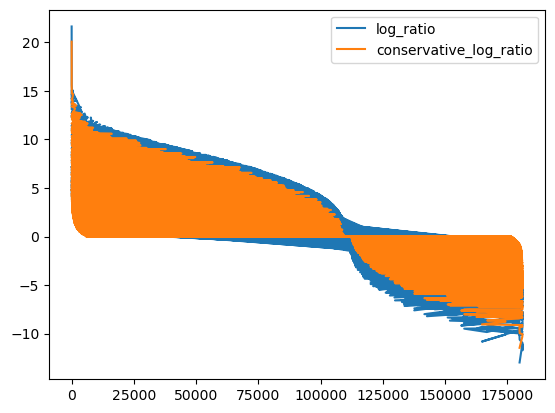

In [17]:
amdf[['log_ratio', 'conservative_log_ratio']].sort_values('conservative_log_ratio').plot()

In [18]:
amdf, adv_adj_top = show_data(df_path=adv_adj_am_path, sort_columns=['joint_probability', 'conservative_log_ratio', 'unexpected_ratio'])

**`ADV <-> ADJ` Top 30 associations**
_by `joint_probability` > `conservative_log_ratio` > `unexpected_ratio`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |       f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|--------:|---------:|---------:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |    1147 |     1387 |     1168 |               0.812 |              1.000 |
|   20 | scantily        | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |    5367 |     5400 |     6984 |               0.764 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |   

**`ADV <-> ADJ` Top 30 associations**
_by `joint_probability` > `conservative_log_ratio` > `unexpected_ratio`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |             f |        f1_adv |        f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|--------------:|--------------:|--------------:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |     1,147.000 |     1,387.000 |     1,168.000 |               0.812 |              1.000 |
|   20 | scantily        | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |     5,367.000 |     5,400.000 |     6,984.000 |               0.764 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 |     1,560.000 |     1,705.000 |     2,056.000 |               0.694 |              1.000 |
|    8 | partly          | cloudy       |                4.249 |          0.837 |          0.692 |                   12.326 |    54,413.000 |    78,609.000 |    64,959.000 |               0.580 |              0.999 |
|  139 | minimally       | invasive     |                4.368 |          0.527 |          0.808 |                   12.035 |    16,766.000 |    20,751.000 |    31,782.000 |               0.426 |              1.000 |
|  105 | openly          | gay          |                3.823 |          0.567 |          0.582 |                   11.357 |    22,872.000 |    39,295.000 |    40,292.000 |               0.330 |              0.999 |
|  546 | sparsely        | populated    |                5.193 |          0.340 |          0.785 |                   14.702 |     1,006.000 |     1,281.000 |     2,956.000 |               0.267 |              1.000 |
|  366 | aesthetically   | pleasing     |                3.895 |          0.393 |          0.656 |                   11.307 |    13,098.000 |    19,969.000 |    33,285.000 |               0.258 |              0.999 |
|   12 | long            | overdue      |                3.892 |          0.833 |          0.273 |                   12.324 |    20,079.000 |    73,562.000 |    24,087.000 |               0.227 |              0.999 |
|    6 | finely          | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 |     1,109.000 |     4,273.000 |     1,293.000 |               0.223 |              1.000 |
|  696 | morbidly        | obese        |                4.433 |          0.305 |          0.691 |                   12.846 |     3,022.000 |     4,373.000 |     9,895.000 |               0.211 |              1.000 |
|  319 | dimly           | lit          |                4.708 |          0.407 |          0.516 |                   14.274 |     1,192.000 |     2,310.000 |     2,930.000 |               0.210 |              1.000 |
|  111 | tightly         | knit         |                4.745 |          0.556 |          0.365 |                   14.723 |     1,080.000 |     2,955.000 |     1,942.000 |               0.203 |              1.000 |
|  140 | personally      | identifiable |                3.600 |          0.526 |          0.361 |                   11.206 |    13,128.000 |    36,400.000 |    24,933.000 |               0.190 |              0.999 |
| 1410 | closely         | related      |                3.787 |          0.202 |          0.886 |                    9.374 |    27,154.000 |    30,603.000 |   134,140.000 |               0.179 |              0.998 |
|  397 | electrically    | conductive   |                4.587 |          0.383 |          0.443 |                   14.061 |     1,062.000 |     2,398.000 |     2,775.000 |               0.169 |              1.000 |
|  535 | mentally        | ill          |                3.008 |          0.342 |          0.475 |                    9.009 |    38,566.000 |    80,995.000 |   112,689.000 |               0.162 |              0.997 |
|  627 | environmentally | friendly     |                2.980 |          0.321 |          0.504 |                    8.838 |    41,955.000 |    83,097.000 |   130,621.000 |               0.162 |              0.997 |
| 1165 | inversely       | proportional |                4.437 |          0.229 |          0.627 |                   13.065 |     1,528.000 |     2,435.000 |     6,659.000 |               0.144 |              1.000 |
|  624 | densely         | populated    |                4.483 |          0.321 |          0.423 |                   13.761 |       949.000 |     2,245.000 |     2,956.000 |               0.136 |              1.000 |
| 2400 | terminally      | ill          |                3.906 |          0.142 |          0.902 |                    9.531 |    15,975.000 |    17,679.000 |   112,689.000 |               0.128 |              0.999 |
| 3003 | wide            | open         |                3.748 |          0.120 |          0.935 |                    8.392 |    30,703.000 |    32,734.000 |   255,047.000 |               0.113 |              0.997 |
|  201 | heavily         | armed        |                3.385 |          0.482 |          0.211 |                   10.776 |     8,567.000 |    40,527.000 |    17,760.000 |               0.102 |              0.999 |
|  273 | sexually        | explicit     |                3.176 |          0.434 |          0.235 |                   10.066 |    13,106.000 |    55,653.000 |    30,195.000 |               0.102 |              0.998 |
|   44 | religiously     | unaffiliated |                4.477 |          0.688 |          0.146 |                   14.185 |     1,048.000 |     7,160.000 |     1,524.000 |               0.101 |              1.000 |
|  117 | long            | lasting      |                3.229 |          0.550 |          0.182 |                   10.328 |    13,366.000 |    73,562.000 |    24,273.000 |               0.100 |              0.998 |
| 3144 | cautiously      | optimistic   |                3.793 |          0.116 |          0.842 |                    9.839 |     9,442.000 |    11,204.000 |    81,289.000 |               0.098 |              0.999 |
|  109 | fast            | paced        |                4.217 |          0.557 |          0.170 |                   13.390 |     1,297.000 |     7,643.000 |     2,329.000 |               0.094 |              1.000 |
|  198 | so              | many         |                1.295 |          0.483 |          0.195 |                    3.972 | 1,191,864.000 | 5,735,964.000 | 2,210,387.000 |               0.094 |              0.872 |
| 3161 | respectfully    | foolish      |                4.435 |          0.115 |          0.803 |                   12.163 |     1,627.000 |     2,026.000 |    14,095.000 |               0.093 |              1.000 |


In [19]:
adv_given_adj, adv_given_adj_top = show_data(
    df=amdf, data_name='`ADV <- ADJ`', 
    sort_columns=['am_p1_given2', 'f2_adj','unexpected_ratio', 'f'])

**`ADV <- ADJ` Top 30 associations**
_by `am_p1_given2` > `f2_adj` > `unexpected_ratio` > `f`_

|    | 1_adv       | 2_adj          |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |      f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|---:|:------------|:---------------|---------------------:|---------------:|---------------:|-------------------------:|-------:|---------:|---------:|--------------------:|-------------------:|
|  0 | far         | away           |                4.510 |          0.989 |          0.003 |                   12.675 |   1284 |   439392 |     1291 |               0.003 |              0.995 |
|  1 | bone        | marrow         |                7.267 |          0.982 |          0.827 |                   20.079 |   1147 |     1387 |     1168 |               0.812 |              1.000 |
|  2 | well        | intentioned    |                3.705 |          0.914 |          0.010 |                   11.645 

**`ADV <- ADJ` Top 30 associations**
_by `am_p1_given2` > `f2_adj` > `unexpected_ratio` > `f`_

|    | 1_adv       | 2_adj          |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |           f |        f1_adv |      f2_adj |   joint_probability |   unexpected_ratio |
|---:|:------------|:---------------|---------------------:|---------------:|---------------:|-------------------------:|------------:|--------------:|------------:|--------------------:|-------------------:|
|  0 | far         | away           |                4.510 |          0.989 |          0.003 |                   12.675 |   1,284.000 |   439,392.000 |   1,291.000 |               0.003 |              0.995 |
|  1 | bone        | marrow         |                7.267 |          0.982 |          0.827 |                   20.079 |   1,147.000 |     1,387.000 |   1,168.000 |               0.812 |              1.000 |
|  2 | well        | intentioned    |                3.705 |          0.914 |          0.010 |                   11.645 |   1,786.000 |   180,997.000 |   1,949.000 |               0.009 |              0.998 |
|  3 | most        | wanted         |                2.870 |          0.896 |          0.000 |                    8.429 |   3,371.000 | 7,568,812.000 |   3,416.000 |               0.000 |              0.908 |
|  4 | legally     | binding        |                4.202 |          0.868 |          0.066 |                   13.407 |   2,438.000 |    36,949.000 |   2,807.000 |               0.057 |              0.999 |
|  5 | very        | own            |                2.593 |          0.863 |          0.010 |                    8.405 |  95,941.000 | 9,913,432.000 |  97,771.000 |               0.008 |              0.879 |
|  6 | finely      | chopped        |                5.199 |          0.858 |          0.260 |                   16.201 |   1,109.000 |     4,273.000 |   1,293.000 |               0.223 |              1.000 |
|  7 | previously  | unreleased     |                3.860 |          0.856 |          0.066 |                   12.413 |   4,830.000 |    73,337.000 |   5,639.000 |               0.056 |              0.999 |
|  8 | partly      | cloudy         |                4.249 |          0.837 |          0.692 |                   12.326 |  54,413.000 |    78,609.000 |  64,959.000 |               0.580 |              0.999 |
|  9 | seemingly   | never-ending   |                3.431 |          0.837 |          0.011 |                   10.911 |   1,865.000 |   162,309.000 |   2,223.000 |               0.010 |              0.998 |
| 10 | not         | inconsiderable |                2.153 |          0.836 |          0.000 |                    6.377 |     927.000 | 4,415,785.000 |   1,043.000 |               0.000 |              0.940 |
| 11 | very        | first          |                2.165 |          0.834 |          0.015 |                    7.072 | 150,034.000 | 9,913,432.000 | 157,749.000 |               0.013 |              0.875 |
| 12 | long        | overdue        |                3.892 |          0.833 |          0.273 |                   12.324 |  20,079.000 |    73,562.000 |  24,087.000 |               0.227 |              0.999 |
| 13 | very        | earliest       |                2.154 |          0.832 |          0.000 |                    6.391 |   2,091.000 | 9,913,432.000 |   2,199.000 |               0.000 |              0.875 |
| 14 | now         | defunct        |                2.986 |          0.829 |          0.018 |                    9.664 |   7,932.000 |   438,049.000 |   9,510.000 |               0.015 |              0.994 |
| 15 | highly      | regarded       |                2.729 |          0.823 |          0.005 |                    8.724 |   3,562.000 |   764,843.000 |   4,282.000 |               0.004 |              0.989 |
| 16 | most        | populous       |                1.997 |          0.818 |          0.004 |                    6.470 |  29,436.000 | 7,568,812.000 |  32,409.000 |               0.003 |              0.900 |
| 17 | too         | late           |                2.085 |          0.798 |          0.038 |                    6.814 | 136,383.000 | 3,557,440.000 | 162,501.000 |               0.030 |              0.949 |
| 18 | not         | returnable     |                1.965 |          0.785 |          0.000 |                    5.982 |   1,351.000 | 4,415,785.000 |   1,612.000 |               0.000 |              0.937 |
| 19 | most        | distinguishing |                1.831 |          0.781 |          0.000 |                    5.289 |     769.000 | 7,568,812.000 |     882.000 |               0.000 |              0.896 |
| 20 | scantily    | clad           |                6.916 |          0.768 |          0.994 |                   15.408 |   5,367.000 |     5,400.000 |   6,984.000 |               0.764 |              1.000 |
| 21 | very        | latest         |                1.761 |          0.767 |          0.001 |                    5.557 |   6,986.000 | 9,913,432.000 |   7,883.000 |               0.001 |              0.866 |
| 23 | thinly      | veiled         |                6.255 |          0.759 |          0.915 |                   16.804 |   1,560.000 |     1,705.000 |   2,056.000 |               0.694 |              1.000 |
| 22 | just        | sayin          |                2.622 |          0.759 |          0.001 |                    8.126 |     838.000 |   648,023.000 |   1,093.000 |               0.001 |              0.990 |
| 24 | very        | same           |                1.724 |          0.758 |          0.005 |                    5.614 |  49,174.000 | 9,913,432.000 |  56,073.000 |               0.004 |              0.864 |
| 25 | highly      | touted         |                2.542 |          0.754 |          0.002 |                    7.970 |   1,278.000 |   764,843.000 |   1,674.000 |               0.001 |              0.988 |
| 26 | most        | storied        |                1.723 |          0.750 |          0.000 |                    5.102 |   1,053.000 | 7,568,812.000 |   1,252.000 |               0.000 |              0.892 |
| 27 | desperately | needed         |                4.310 |          0.748 |          0.070 |                   13.672 |     914.000 |    13,003.000 |   1,222.000 |               0.053 |              1.000 |
| 28 | potentially | libelous       |                3.082 |          0.746 |          0.004 |                    9.685 |     897.000 |   205,787.000 |   1,198.000 |               0.003 |              0.997 |
| 30 | most        | ardent         |                1.701 |          0.743 |          0.001 |                    5.413 |   7,357.000 | 7,568,812.000 |   8,823.000 |               0.001 |              0.891 |


In [20]:
adv_given_adj, adv_given_adj_top = show_data(
    df=amdf, data_name='`ADV -> ADJ`', 
    sort_columns=['am_p2_given1', 'f1_adv', 'unexpected_ratio', 'f'])

**`ADV -> ADJ` Top 30 associations**
_by `am_p2_given1` > `f1_adv` > `unexpected_ratio` > `f`_

|       | 1_adv        | 2_adj      |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |     f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|------:|:-------------|:-----------|---------------------:|---------------:|---------------:|-------------------------:|------:|---------:|---------:|--------------------:|-------------------:|
| 27662 | chock        | full       |                6.312 |          0.012 |          0.999 |                    9.397 |  1288 |     1288 |   105700 |               0.012 |              0.999 |
|    20 | scantily     | clad       |                6.916 |          0.768 |          0.994 |                   15.408 |  5367 |     5400 |     6984 |               0.764 |              1.000 |
| 23055 | crystal      | clear      |                4.411 |          0.015 |          0.988 |                    7.325 |  7

**`ADV -> ADJ` Top 30 associations**
_by `am_p2_given1` > `f1_adv` > `unexpected_ratio` > `f`_

|       | 1_adv        | 2_adj      |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |          f |     f1_adv |        f2_adj |   joint_probability |   unexpected_ratio |
|------:|:-------------|:-----------|---------------------:|---------------:|---------------:|-------------------------:|-----------:|-----------:|--------------:|--------------------:|-------------------:|
| 27662 | chock        | full       |                6.312 |          0.012 |          0.999 |                    9.397 |  1,288.000 |  1,288.000 |   105,700.000 |               0.012 |              0.999 |
|    20 | scantily     | clad       |                6.916 |          0.768 |          0.994 |                   15.408 |  5,367.000 |  5,400.000 |     6,984.000 |               0.764 |              1.000 |
| 23055 | crystal      | clear      |                4.411 |          0.015 |          0.988 |                    7.325 |  7,566.000 |  7,616.000 |   489,305.000 |               0.015 |              0.994 |
| 35589 | proof        | positive   |                4.170 |          0.008 |          0.968 |                    8.569 |  1,543.000 |  1,590.000 |   184,198.000 |               0.008 |              0.998 |
|  4075 | upwardly     | mobile     |                5.001 |          0.094 |          0.960 |                   11.757 |  2,098.000 |  2,184.000 |    22,263.000 |               0.091 |              1.000 |
|  9184 | brand        | new        |                3.747 |          0.043 |          0.950 |                    7.945 | 13,868.000 | 14,541.000 |   320,056.000 |               0.041 |              0.996 |
| 43271 | hiv          | positive   |                3.948 |          0.006 |          0.950 |                    8.493 |  1,085.000 |  1,140.000 |   184,198.000 |               0.006 |              0.998 |
| 19962 | spotlessly   | clean      |                4.219 |          0.018 |          0.941 |                    9.697 |  1,520.000 |  1,614.000 |    82,452.000 |               0.017 |              0.999 |
|  3003 | wide         | open       |                3.748 |          0.120 |          0.935 |                    8.392 | 30,703.000 | 32,734.000 |   255,047.000 |               0.113 |              0.997 |
| 67574 | funnily      | enough     |                3.345 |          0.002 |          0.918 |                    7.116 |    835.000 |    904.000 |   450,646.000 |               0.002 |              0.994 |
| 25672 | at           | best       |                3.664 |          0.014 |          0.917 |                    8.379 |  2,813.000 |  3,059.000 |   208,298.000 |               0.012 |              0.997 |
|    23 | thinly       | veiled     |                6.255 |          0.759 |          0.915 |                   16.804 |  1,560.000 |  1,705.000 |     2,056.000 |               0.694 |              1.000 |
| 44093 | red          | hot        |                3.734 |          0.006 |          0.914 |                    8.551 |    954.000 |  1,041.000 |   168,245.000 |               0.005 |              0.998 |
|  2400 | terminally   | ill        |                3.906 |          0.142 |          0.902 |                    9.531 | 15,975.000 | 17,679.000 |   112,689.000 |               0.128 |              0.999 |
|  1410 | closely      | related    |                3.787 |          0.202 |          0.886 |                    9.374 | 27,154.000 | 30,603.000 |   134,140.000 |               0.179 |              0.998 |
| 37141 | vitally      | important  |                2.567 |          0.008 |          0.882 |                    5.051 | 17,207.000 | 18,940.000 | 2,199,447.000 |               0.007 |              0.971 |
| 27528 | distantly    | related    |                3.623 |          0.012 |          0.868 |                    8.881 |  1,647.000 |  1,893.000 |   134,140.000 |               0.011 |              0.998 |
| 16560 | worst        | possible   |                3.177 |          0.023 |          0.861 |                    7.575 |  8,302.000 |  9,594.000 |   362,284.000 |               0.020 |              0.995 |
| 17266 | humanly      | possible   |                3.141 |          0.022 |          0.851 |                    7.554 |  7,913.000 |  9,251.000 |   362,284.000 |               0.019 |              0.995 |
|  3144 | cautiously   | optimistic |                3.793 |          0.116 |          0.842 |                    9.839 |  9,442.000 | 11,204.000 |    81,289.000 |               0.098 |              0.999 |
|     1 | bone         | marrow     |                7.267 |          0.982 |          0.827 |                   20.079 |  1,147.000 |  1,387.000 |     1,168.000 |               0.812 |              1.000 |
| 11269 | kind         | enough     |                2.972 |          0.035 |          0.826 |                    7.245 | 15,666.000 | 18,849.000 |   450,646.000 |               0.029 |              0.993 |
| 14938 | abundantly   | clear      |                2.893 |          0.026 |          0.812 |                    7.082 | 12,579.000 | 15,376.000 |   489,305.000 |               0.021 |              0.993 |
| 23718 | pearly       | white      |                3.761 |          0.015 |          0.812 |                    9.795 |    947.000 |  1,165.000 |    63,525.000 |               0.012 |              0.999 |
| 21640 | mobile       | friendly   |                3.448 |          0.017 |          0.811 |                    8.856 |  2,181.000 |  2,684.000 |   130,621.000 |               0.014 |              0.998 |
|   139 | minimally    | invasive   |                4.368 |          0.527 |          0.808 |                   12.035 | 16,766.000 | 20,751.000 |    31,782.000 |               0.426 |              1.000 |
|  3161 | respectfully | foolish    |                4.435 |          0.115 |          0.803 |                   12.163 |  1,627.000 |  2,026.000 |    14,095.000 |               0.093 |              1.000 |
| 36604 | tangentially | related    |                3.388 |          0.008 |          0.795 |                    8.695 |  1,072.000 |  1,346.000 |   134,140.000 |               0.006 |              0.998 |
| 10698 | backwards    | compatible |                3.969 |          0.037 |          0.791 |                   10.680 |  1,292.000 |  1,632.000 |    35,194.000 |               0.029 |              0.999 |
| 74508 | crucially    | important  |                2.205 |          0.001 |          0.787 |                    4.784 |  2,813.000 |  3,460.000 | 2,199,447.000 |               0.001 |              0.968 |


In [21]:
lrc_skew, lrc_skew_top = show_data(
    df_path=ucs_df_dir.joinpath('adv_adj/skewed/all_adj-x-adv_frq-thr0-001p.35f=868+_min15x.SKEW-lrc.pkl.gz'), 
    sort_columns=['conservative_log_ratio', 'unexpected_ratio', 'f'])

**`ADV <-> ADJ` Top 30 associations**
_by `conservative_log_ratio` > `unexpected_ratio` > `f`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |    f |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|-----:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 | 1147 |               0.812 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 | 1560 |               0.694 |              1.000 |
|    6 | finely          | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 | 1109 |               0.223 |              1.000 |
|   20 | scantily       

**`ADV <-> ADJ` Top 30 associations**
_by `conservative_log_ratio` > `unexpected_ratio` > `f`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |         f |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|----------:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 | 1,147.000 |               0.812 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 | 1,560.000 |               0.694 |              1.000 |
|    6 | finely          | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 | 1,109.000 |               0.223 |              1.000 |
|   20 | scantily        | clad         |                6.916 |          0.768 |          0.994 |                   15.408 | 5,367.000 |               0.764 |              1.000 |
|  111 | tightly         | knit         |                4.745 |          0.556 |          0.365 |                   14.723 | 1,080.000 |               0.203 |              1.000 |
|  546 | sparsely        | populated    |                5.193 |          0.340 |          0.785 |                   14.702 | 1,006.000 |               0.267 |              1.000 |
|  319 | dimly           | lit          |                4.708 |          0.407 |          0.516 |                   14.274 | 1,192.000 |               0.210 |              1.000 |
|   44 | religiously     | unaffiliated |                4.477 |          0.688 |          0.146 |                   14.185 | 1,048.000 |               0.101 |              1.000 |
|  397 | electrically    | conductive   |                4.587 |          0.383 |          0.443 |                   14.061 | 1,062.000 |               0.169 |              1.000 |
|  195 | carefully       | orchestrated |                4.453 |          0.485 |          0.134 |                   14.011 |   428.000 |               0.065 |              1.000 |
|  624 | densely         | populated    |                4.483 |          0.321 |          0.423 |                   13.761 |   949.000 |               0.136 |              1.000 |
|  112 | rapidly         | aging        |                4.333 |          0.554 |          0.122 |                   13.719 |   666.000 |               0.067 |              1.000 |
|  799 | brightly        | hued         |                4.386 |          0.285 |          0.200 |                   13.689 |   342.000 |               0.057 |              1.000 |
|   27 | desperately     | needed       |                4.310 |          0.748 |          0.070 |                   13.672 |   914.000 |               0.053 |              1.000 |
| 1245 | anywhere        | else         |                4.396 |          0.220 |          0.180 |                   13.617 |   207.000 |               0.040 |              1.000 |
| 1849 | farther         | afield       |                4.392 |          0.171 |          0.332 |                   13.488 |   347.000 |               0.057 |              1.000 |
|    4 | legally         | binding      |                4.202 |          0.868 |          0.066 |                   13.407 | 2,438.000 |               0.057 |              0.999 |
|  109 | fast            | paced        |                4.217 |          0.557 |          0.170 |                   13.390 | 1,297.000 |               0.094 |              1.000 |
| 1390 | brightly        | lit          |                4.283 |          0.204 |          0.350 |                   13.210 |   597.000 |               0.071 |              1.000 |
| 1165 | inversely       | proportional |                4.437 |          0.229 |          0.627 |                   13.065 | 1,528.000 |               0.144 |              1.000 |
|  854 | tightly         | woven        |                4.092 |          0.276 |          0.132 |                   12.873 |   391.000 |               0.036 |              1.000 |
|  485 | gently          | undulating   |                4.085 |          0.356 |          0.083 |                   12.863 |   341.000 |               0.029 |              1.000 |
|  696 | morbidly        | obese        |                4.433 |          0.305 |          0.691 |                   12.846 | 3,022.000 |               0.211 |              1.000 |
| 2892 | faster          | paced        |                4.120 |          0.124 |          0.244 |                   12.724 |   289.000 |               0.030 |              1.000 |
| 1692 | everywhere      | else         |                4.107 |          0.182 |          0.106 |                   12.723 |   171.000 |               0.019 |              1.000 |
| 3422 | farther         | east         |                4.137 |          0.109 |          0.291 |                   12.709 |   304.000 |               0.032 |              1.000 |
|    0 | far             | away         |                4.510 |          0.989 |          0.003 |                   12.675 | 1,284.000 |               0.003 |              0.995 |
|   53 | kind            | hearted      |                3.963 |          0.663 |          0.053 |                   12.635 | 1,005.000 |               0.035 |              1.000 |
|  124 | internationally | supervised   |                3.985 |          0.541 |          0.048 |                   12.619 |   518.000 |               0.026 |              1.000 |
| 3780 | electronically  | controlled   |                4.099 |          0.100 |          0.188 |                   12.584 |   171.000 |               0.019 |              1.000 |


In [22]:
bidirectional_skew = pd.read_pickle(ucs_df_dir.joinpath('adv_adj/skewed/all_adj-x-adv_frq-thr0-001p.35f=868+_min15x.SKEW.pkl.gz'))
bidirectional_skew 

,l1,l2,f,E11,am_log_likelihood,am_odds_ratio_disc,am_p1_given2,am_p2_given1,log_ratio,conservative_log_ratio,unexpected_count,unexpected_ratio,joint_probability
1,bone,marrow,1147,0.019,26482.132812,7.267,0.982,0.827,21.645,20.079,1146.980957,1.0,0.812
20,scantily,clad,5367,0.453,106353.468750,6.916,0.768,0.994,15.644,15.408,5366.546875,1.0,0.764


In [23]:
joint_prob, joint_prob_top = show_data(df = amdf, sort_columns=['joint_probability', 'unexpected_ratio', 'f'])

**`ADV <-> ADJ` Top 30 associations**
_by `joint_probability` > `unexpected_ratio` > `f`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |       f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|--------:|---------:|---------:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |    1147 |     1387 |     1168 |               0.812 |              1.000 |
|   20 | scantily        | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |    5367 |     5400 |     6984 |               0.764 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |          0.915 |       

**`ADV <-> ADJ` Top 30 associations**
_by `joint_probability` > `unexpected_ratio` > `f`_

|      | 1_adv           | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |             f |        f1_adv |        f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:----------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|--------------:|--------------:|--------------:|--------------------:|-------------------:|
|    1 | bone            | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |     1,147.000 |     1,387.000 |     1,168.000 |               0.812 |              1.000 |
|   20 | scantily        | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |     5,367.000 |     5,400.000 |     6,984.000 |               0.764 |              1.000 |
|   23 | thinly          | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 |     1,560.000 |     1,705.000 |     2,056.000 |               0.694 |              1.000 |
|    8 | partly          | cloudy       |                4.249 |          0.837 |          0.692 |                   12.326 |    54,413.000 |    78,609.000 |    64,959.000 |               0.580 |              0.999 |
|  139 | minimally       | invasive     |                4.368 |          0.527 |          0.808 |                   12.035 |    16,766.000 |    20,751.000 |    31,782.000 |               0.426 |              1.000 |
|  105 | openly          | gay          |                3.823 |          0.567 |          0.582 |                   11.357 |    22,872.000 |    39,295.000 |    40,292.000 |               0.330 |              0.999 |
|  546 | sparsely        | populated    |                5.193 |          0.340 |          0.785 |                   14.702 |     1,006.000 |     1,281.000 |     2,956.000 |               0.267 |              1.000 |
|  366 | aesthetically   | pleasing     |                3.895 |          0.393 |          0.656 |                   11.307 |    13,098.000 |    19,969.000 |    33,285.000 |               0.258 |              0.999 |
|   12 | long            | overdue      |                3.892 |          0.833 |          0.273 |                   12.324 |    20,079.000 |    73,562.000 |    24,087.000 |               0.227 |              0.999 |
|    6 | finely          | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 |     1,109.000 |     4,273.000 |     1,293.000 |               0.223 |              1.000 |
|  696 | morbidly        | obese        |                4.433 |          0.305 |          0.691 |                   12.846 |     3,022.000 |     4,373.000 |     9,895.000 |               0.211 |              1.000 |
|  319 | dimly           | lit          |                4.708 |          0.407 |          0.516 |                   14.274 |     1,192.000 |     2,310.000 |     2,930.000 |               0.210 |              1.000 |
|  111 | tightly         | knit         |                4.745 |          0.556 |          0.365 |                   14.723 |     1,080.000 |     2,955.000 |     1,942.000 |               0.203 |              1.000 |
|  140 | personally      | identifiable |                3.600 |          0.526 |          0.361 |                   11.206 |    13,128.000 |    36,400.000 |    24,933.000 |               0.190 |              0.999 |
| 1410 | closely         | related      |                3.787 |          0.202 |          0.886 |                    9.374 |    27,154.000 |    30,603.000 |   134,140.000 |               0.179 |              0.998 |
|  397 | electrically    | conductive   |                4.587 |          0.383 |          0.443 |                   14.061 |     1,062.000 |     2,398.000 |     2,775.000 |               0.169 |              1.000 |
|  627 | environmentally | friendly     |                2.980 |          0.321 |          0.504 |                    8.838 |    41,955.000 |    83,097.000 |   130,621.000 |               0.162 |              0.997 |
|  535 | mentally        | ill          |                3.008 |          0.342 |          0.475 |                    9.009 |    38,566.000 |    80,995.000 |   112,689.000 |               0.162 |              0.997 |
| 1165 | inversely       | proportional |                4.437 |          0.229 |          0.627 |                   13.065 |     1,528.000 |     2,435.000 |     6,659.000 |               0.144 |              1.000 |
|  624 | densely         | populated    |                4.483 |          0.321 |          0.423 |                   13.761 |       949.000 |     2,245.000 |     2,956.000 |               0.136 |              1.000 |
| 2400 | terminally      | ill          |                3.906 |          0.142 |          0.902 |                    9.531 |    15,975.000 |    17,679.000 |   112,689.000 |               0.128 |              0.999 |
| 3003 | wide            | open         |                3.748 |          0.120 |          0.935 |                    8.392 |    30,703.000 |    32,734.000 |   255,047.000 |               0.113 |              0.997 |
|  201 | heavily         | armed        |                3.385 |          0.482 |          0.211 |                   10.776 |     8,567.000 |    40,527.000 |    17,760.000 |               0.102 |              0.999 |
|  273 | sexually        | explicit     |                3.176 |          0.434 |          0.235 |                   10.066 |    13,106.000 |    55,653.000 |    30,195.000 |               0.102 |              0.998 |
|   44 | religiously     | unaffiliated |                4.477 |          0.688 |          0.146 |                   14.185 |     1,048.000 |     7,160.000 |     1,524.000 |               0.101 |              1.000 |
|  117 | long            | lasting      |                3.229 |          0.550 |          0.182 |                   10.328 |    13,366.000 |    73,562.000 |    24,273.000 |               0.100 |              0.998 |
| 3144 | cautiously      | optimistic   |                3.793 |          0.116 |          0.842 |                    9.839 |     9,442.000 |    11,204.000 |    81,289.000 |               0.098 |              0.999 |
|  109 | fast            | paced        |                4.217 |          0.557 |          0.170 |                   13.390 |     1,297.000 |     7,643.000 |     2,329.000 |               0.094 |              1.000 |
|  198 | so              | many         |                1.295 |          0.483 |          0.195 |                    3.972 | 1,191,864.000 | 5,735,964.000 | 2,210,387.000 |               0.094 |              0.872 |
| 3161 | respectfully    | foolish      |                4.435 |          0.115 |          0.803 |                   12.163 |     1,627.000 |     2,026.000 |    14,095.000 |               0.093 |              1.000 |


In [24]:
odds_ratio, odds_ratio_disc = show_data(df=amdf, sort_columns=['am_odds_ratio_disc', 'unexpected_ratio', 'f', 'conservative_log_ratio'])

**`ADV <-> ADJ` Top 30 associations**
_by `am_odds_ratio_disc` > `unexpected_ratio` > `f` > `conservative_log_ratio`_

|       | 1_adv         | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |     f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|------:|:--------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|------:|---------:|---------:|--------------------:|-------------------:|
|     1 | bone          | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |  1147 |     1387 |     1168 |               0.812 |              1.000 |
|    20 | scantily      | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |  5367 |     5400 |     6984 |               0.764 |              1.000 |
| 27662 | chock         | full         |                6.312 |          0.012 |         

**`ADV <-> ADJ` Top 30 associations**
_by `am_odds_ratio_disc` > `unexpected_ratio` > `f` > `conservative_log_ratio`_

|       | 1_adv         | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |          f |      f1_adv |      f2_adj |   joint_probability |   unexpected_ratio |
|------:|:--------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|-----------:|------------:|------------:|--------------------:|-------------------:|
|     1 | bone          | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |  1,147.000 |   1,387.000 |   1,168.000 |               0.812 |              1.000 |
|    20 | scantily      | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |  5,367.000 |   5,400.000 |   6,984.000 |               0.764 |              1.000 |
| 27662 | chock         | full         |                6.312 |          0.012 |          0.999 |                    9.397 |  1,288.000 |   1,288.000 | 105,700.000 |               0.012 |              0.999 |
|    23 | thinly        | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 |  1,560.000 |   1,705.000 |   2,056.000 |               0.694 |              1.000 |
|     6 | finely        | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 |  1,109.000 |   4,273.000 |   1,293.000 |               0.223 |              1.000 |
|   546 | sparsely      | populated    |                5.193 |          0.340 |          0.785 |                   14.702 |  1,006.000 |   1,281.000 |   2,956.000 |               0.267 |              1.000 |
|  4075 | upwardly      | mobile       |                5.001 |          0.094 |          0.960 |                   11.757 |  2,098.000 |   2,184.000 |  22,263.000 |               0.091 |              1.000 |
|   111 | tightly       | knit         |                4.745 |          0.556 |          0.365 |                   14.723 |  1,080.000 |   2,955.000 |   1,942.000 |               0.203 |              1.000 |
|   319 | dimly         | lit          |                4.708 |          0.407 |          0.516 |                   14.274 |  1,192.000 |   2,310.000 |   2,930.000 |               0.210 |              1.000 |
|   397 | electrically  | conductive   |                4.587 |          0.383 |          0.443 |                   14.061 |  1,062.000 |   2,398.000 |   2,775.000 |               0.169 |              1.000 |
|     0 | far           | away         |                4.510 |          0.989 |          0.003 |                   12.675 |  1,284.000 | 439,392.000 |   1,291.000 |               0.003 |              0.995 |
|   624 | densely       | populated    |                4.483 |          0.321 |          0.423 |                   13.761 |    949.000 |   2,245.000 |   2,956.000 |               0.136 |              1.000 |
|    44 | religiously   | unaffiliated |                4.477 |          0.688 |          0.146 |                   14.185 |  1,048.000 |   7,160.000 |   1,524.000 |               0.101 |              1.000 |
|   195 | carefully     | orchestrated |                4.453 |          0.485 |          0.134 |                   14.011 |    428.000 |   3,190.000 |     883.000 |               0.065 |              1.000 |
|  1165 | inversely     | proportional |                4.437 |          0.229 |          0.627 |                   13.065 |  1,528.000 |   2,435.000 |   6,659.000 |               0.144 |              1.000 |
|  4096 | diametrically | opposite     |                4.436 |          0.094 |          0.732 |                   12.528 |    862.000 |   1,178.000 |   9,184.000 |               0.069 |              1.000 |
|  3161 | respectfully  | foolish      |                4.435 |          0.115 |          0.803 |                   12.163 |  1,627.000 |   2,026.000 |  14,095.000 |               0.093 |              1.000 |
|   696 | morbidly      | obese        |                4.433 |          0.305 |          0.691 |                   12.846 |  3,022.000 |   4,373.000 |   9,895.000 |               0.211 |              1.000 |
| 23055 | crystal       | clear        |                4.411 |          0.015 |          0.988 |                    7.325 |  7,566.000 |   7,616.000 | 489,305.000 |               0.015 |              0.994 |
|  1245 | anywhere      | else         |                4.396 |          0.220 |          0.180 |                   13.617 |    207.000 |   1,151.000 |     942.000 |               0.040 |              1.000 |
|  1849 | farther       | afield       |                4.392 |          0.171 |          0.332 |                   13.488 |    347.000 |   1,045.000 |   2,028.000 |               0.057 |              1.000 |
|   799 | brightly      | hued         |                4.386 |          0.285 |          0.200 |                   13.689 |    342.000 |   1,707.000 |   1,201.000 |               0.057 |              1.000 |
|   139 | minimally     | invasive     |                4.368 |          0.527 |          0.808 |                   12.035 | 16,766.000 |  20,751.000 |  31,782.000 |               0.426 |              1.000 |
|   112 | rapidly       | aging        |                4.333 |          0.554 |          0.122 |                   13.719 |    666.000 |   5,477.000 |   1,201.000 |               0.067 |              1.000 |
|    27 | desperately   | needed       |                4.310 |          0.748 |          0.070 |                   13.672 |    914.000 |  13,003.000 |   1,222.000 |               0.053 |              1.000 |
|  1390 | brightly      | lit          |                4.283 |          0.204 |          0.350 |                   13.210 |    597.000 |   1,707.000 |   2,930.000 |               0.071 |              1.000 |
|     8 | partly        | cloudy       |                4.249 |          0.837 |          0.692 |                   12.326 | 54,413.000 |  78,609.000 |  64,959.000 |               0.580 |              0.999 |
| 19962 | spotlessly    | clean        |                4.219 |          0.018 |          0.941 |                    9.697 |  1,520.000 |   1,614.000 |  82,452.000 |               0.017 |              0.999 |
|   109 | fast          | paced        |                4.217 |          0.557 |          0.170 |                   13.390 |  1,297.000 |   7,643.000 |   2,329.000 |               0.094 |              1.000 |
|     4 | legally       | binding      |                4.202 |          0.868 |          0.066 |                   13.407 |  2,438.000 |  36,949.000 |   2,807.000 |               0.057 |              0.999 |


In [25]:
surprise, surprise_top = show_data(df=amdf, sort_columns=['unexpected_ratio','f','joint_probability'])

**`ADV <-> ADJ` Top 30 associations**
_by `unexpected_ratio` > `f` > `joint_probability`_

|      | 1_adv        | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |     f |   f1_adv |   f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:-------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|------:|---------:|---------:|--------------------:|-------------------:|
|  139 | minimally    | invasive     |                4.368 |          0.527 |          0.808 |                   12.035 | 16766 |    20751 |    31782 |               0.426 |              1.000 |
|   20 | scantily     | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |  5367 |     5400 |     6984 |               0.764 |              1.000 |
|  696 | morbidly     | obese        |                4.433 |          0.305 |          0.691 |                   12.846 |  3

**`ADV <-> ADJ` Top 30 associations**
_by `unexpected_ratio` > `f` > `joint_probability`_

|      | 1_adv        | 2_adj        |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |          f |     f1_adv |     f2_adj |   joint_probability |   unexpected_ratio |
|-----:|:-------------|:-------------|---------------------:|---------------:|---------------:|-------------------------:|-----------:|-----------:|-----------:|--------------------:|-------------------:|
|  139 | minimally    | invasive     |                4.368 |          0.527 |          0.808 |                   12.035 | 16,766.000 | 20,751.000 | 31,782.000 |               0.426 |              1.000 |
|   20 | scantily     | clad         |                6.916 |          0.768 |          0.994 |                   15.408 |  5,367.000 |  5,400.000 |  6,984.000 |               0.764 |              1.000 |
|  696 | morbidly     | obese        |                4.433 |          0.305 |          0.691 |                   12.846 |  3,022.000 |  4,373.000 |  9,895.000 |               0.211 |              1.000 |
| 4075 | upwardly     | mobile       |                5.001 |          0.094 |          0.960 |                   11.757 |  2,098.000 |  2,184.000 | 22,263.000 |               0.091 |              1.000 |
|  145 | non          | existent     |                3.780 |          0.522 |          0.109 |                   12.108 |  1,842.000 | 16,939.000 |  3,526.000 |               0.057 |              1.000 |
| 1026 | structurally | deficient    |                3.539 |          0.247 |          0.183 |                   11.230 |  1,765.000 |  9,662.000 |  7,148.000 |               0.045 |              1.000 |
|  714 | criminally   | negligent    |                3.598 |          0.302 |          0.155 |                   11.460 |  1,668.000 | 10,759.000 |  5,521.000 |               0.047 |              1.000 |
| 2729 | verbally     | abusive      |                3.965 |          0.130 |          0.553 |                   11.783 |  1,666.000 |  3,012.000 | 12,844.000 |               0.072 |              1.000 |
| 3161 | respectfully | foolish      |                4.435 |          0.115 |          0.803 |                   12.163 |  1,627.000 |  2,026.000 | 14,095.000 |               0.093 |              1.000 |
|  883 | darkly       | comic        |                3.568 |          0.271 |          0.161 |                   11.350 |  1,609.000 |  9,977.000 |  5,938.000 |               0.044 |              1.000 |
|   23 | thinly       | veiled       |                6.255 |          0.759 |          0.915 |                   16.804 |  1,560.000 |  1,705.000 |  2,056.000 |               0.694 |              1.000 |
| 1165 | inversely    | proportional |                4.437 |          0.229 |          0.627 |                   13.065 |  1,528.000 |  2,435.000 |  6,659.000 |               0.144 |              1.000 |
| 1349 | lightly      | golden       |                3.522 |          0.207 |          0.173 |                   11.165 |  1,366.000 |  7,913.000 |  6,590.000 |               0.036 |              1.000 |
|  109 | fast         | paced        |                4.217 |          0.557 |          0.170 |                   13.390 |  1,297.000 |  7,643.000 |  2,329.000 |               0.094 |              1.000 |
|  137 | formerly     | communist    |                3.775 |          0.528 |          0.075 |                   12.084 |  1,265.000 | 16,931.000 |  2,393.000 |               0.039 |              1.000 |
|  319 | dimly        | lit          |                4.708 |          0.407 |          0.516 |                   14.274 |  1,192.000 |  2,310.000 |  2,930.000 |               0.210 |              1.000 |
|    1 | bone         | marrow       |                7.267 |          0.982 |          0.827 |                   20.079 |  1,147.000 |  1,387.000 |  1,168.000 |               0.812 |              1.000 |
|    6 | finely       | chopped      |                5.199 |          0.858 |          0.260 |                   16.201 |  1,109.000 |  4,273.000 |  1,293.000 |               0.223 |              1.000 |
|  740 | academically | ineligible   |                3.709 |          0.298 |          0.138 |                   11.800 |  1,101.000 |  8,003.000 |  3,696.000 |               0.041 |              1.000 |
|  410 | genetically  | predisposed  |                3.687 |          0.378 |          0.095 |                   11.778 |  1,085.000 | 11,469.000 |  2,872.000 |               0.036 |              1.000 |
|  111 | tightly      | knit         |                4.745 |          0.556 |          0.365 |                   14.723 |  1,080.000 |  2,955.000 |  1,942.000 |               0.203 |              1.000 |
|  397 | electrically | conductive   |                4.587 |          0.383 |          0.443 |                   14.061 |  1,062.000 |  2,398.000 |  2,775.000 |               0.169 |              1.000 |
| 1011 | later        | invalid      |                3.572 |          0.248 |          0.125 |                   11.369 |  1,058.000 |  8,428.000 |  4,259.000 |               0.031 |              1.000 |
|   44 | religiously  | unaffiliated |                4.477 |          0.688 |          0.146 |                   14.185 |  1,048.000 |  7,160.000 |  1,524.000 |               0.101 |              1.000 |
|  602 | rapidly      | evolving     |                3.954 |          0.325 |          0.186 |                   12.510 |  1,020.000 |  5,477.000 |  3,141.000 |               0.060 |              1.000 |
|  546 | sparsely     | populated    |                5.193 |          0.340 |          0.785 |                   14.702 |  1,006.000 |  1,281.000 |  2,956.000 |               0.267 |              1.000 |
|   53 | kind         | hearted      |                3.963 |          0.663 |          0.053 |                   12.635 |  1,005.000 | 18,849.000 |  1,515.000 |               0.035 |              1.000 |
|  624 | densely      | populated    |                4.483 |          0.321 |          0.423 |                   13.761 |    949.000 |  2,245.000 |  2,956.000 |               0.136 |              1.000 |
|   27 | desperately  | needed       |                4.310 |          0.748 |          0.070 |                   13.672 |    914.000 | 13,003.000 |  1,222.000 |               0.053 |              1.000 |
| 1282 | twice        | weekly       |                3.755 |          0.215 |          0.182 |                   11.860 |    891.000 |  4,903.000 |  4,140.000 |               0.039 |              1.000 |


In [213]:
joint_f, joint_f_top = show_data(df=amdf.assign(percent_of_N=(amdf.f/amdf.N * 100)), sort_columns=['percent_of_N','unexpected_ratio'])

**`ADV <-> ADJ` Top 30 associations**
_by `percent_of_N` > `f` > `unexpected_ratio`_

|       | 1_adv   | 2_adj     |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |             f |        f1_adv |        f2_adj |   joint_probability |   percent_of_N |   unexpected_ratio |
|------:|:--------|:----------|---------------------:|---------------:|---------------:|-------------------------:|--------------:|--------------:|--------------:|--------------------:|---------------:|-------------------:|
|   198 | so      | many      |                1.295 |          0.483 |          0.195 |                    3.972 | 1,191,864.000 | 5,735,964.000 | 2,210,387.000 |               0.094 |          1.431 |              0.872 |
|   959 | most    | important |                0.750 |          0.256 |          0.080 |                    2.356 |   748,533.000 | 7,568,812.000 | 2,199,447.000 |               0.020 |          0.899 |              0.733 |
|   814 | so      

**`ADV <-> ADJ` Top 30 associations**
_by `percent_of_N` > `f` > `unexpected_ratio`_

|       | 1_adv   | 2_adj     |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   conservative_log_ratio |             f |        f1_adv |        f2_adj |   joint_probability |   percent_of_N |   unexpected_ratio |
|------:|:--------|:----------|---------------------:|---------------:|---------------:|-------------------------:|--------------:|--------------:|--------------:|--------------------:|---------------:|-------------------:|
|   198 | so      | many      |                1.295 |          0.483 |          0.195 |                    3.972 | 1,191,864.000 | 5,735,964.000 | 2,210,387.000 |               0.094 |          1.431 |              0.872 |
|   959 | most    | important |                0.750 |          0.256 |          0.080 |                    2.356 |   748,533.000 | 7,568,812.000 | 2,199,447.000 |               0.020 |          0.899 |              0.733 |
|   814 | so      | much      |                0.897 |          0.283 |          0.092 |                    2.825 |   614,652.000 | 5,735,964.000 | 1,776,924.000 |               0.026 |          0.738 |              0.801 |
|   771 | too     | much      |                1.111 |          0.292 |          0.149 |                    3.439 |   583,184.000 | 3,557,440.000 | 1,776,924.000 |               0.043 |          0.700 |              0.870 |
|  2604 | very    | good      |                0.406 |          0.134 |          0.030 |                    1.289 |   507,499.000 | 9,913,432.000 | 2,030,480.000 |               0.004 |          0.609 |              0.524 |
|   441 | more    | likely    |                0.877 |          0.368 |          0.046 |                    2.830 |   498,401.000 | 9,320,997.000 | 1,048,364.000 |               0.017 |          0.598 |              0.765 |
|   163 | not     | sure      |                1.392 |          0.506 |          0.101 |                    4.450 |   467,213.000 | 4,415,785.000 |   844,066.000 |               0.051 |          0.561 |              0.904 |
|  1941 | too     | many      |                0.807 |          0.165 |          0.104 |                    2.505 |   450,194.000 | 3,557,440.000 | 2,210,387.000 |               0.017 |          0.541 |              0.790 |
|  2128 | as      | many      |                0.764 |          0.156 |          0.095 |                    2.378 |   434,631.000 | 3,709,914.000 | 2,210,387.000 |               0.015 |          0.522 |              0.773 |
|   358 | most    | popular   |                0.990 |          0.395 |          0.047 |                    3.200 |   398,955.000 | 7,568,812.000 |   827,608.000 |               0.019 |          0.479 |              0.811 |
|  8747 | very    | important |                0.165 |          0.046 |          0.011 |                    0.517 |   359,610.000 | 9,913,432.000 | 2,199,447.000 |               0.001 |          0.432 |              0.272 |
|   595 | much    | more      |                1.417 |          0.326 |          0.171 |                    4.418 |   355,655.000 | 1,986,728.000 | 1,028,133.000 |               0.056 |          0.427 |              0.931 |
|  2072 | as      | much      |                0.765 |          0.159 |          0.078 |                    2.407 |   355,368.000 | 3,709,914.000 | 1,776,924.000 |               0.012 |          0.427 |              0.777 |
|    43 | most    | recent    |                1.566 |          0.692 |          0.040 |                    5.111 |   313,185.000 | 7,568,812.000 |   401,861.000 |               0.028 |          0.376 |              0.883 |
| 13680 | more    | important |                0.112 |          0.028 |          0.007 |                    0.346 |   306,604.000 | 9,320,997.000 | 2,199,447.000 |               0.000 |          0.368 |              0.197 |
|   409 | much    | better    |                1.501 |          0.378 |          0.143 |                    4.741 |   295,224.000 | 1,986,728.000 |   740,721.000 |               0.054 |          0.354 |              0.940 |
|   335 | most    | common    |                0.998 |          0.403 |          0.032 |                    3.246 |   272,787.000 | 7,568,812.000 |   555,893.000 |               0.013 |          0.328 |              0.815 |
|  3551 | really  | good      |                0.804 |          0.106 |          0.102 |                    2.492 |   260,281.000 | 2,096,057.000 | 2,030,480.000 |               0.011 |          0.313 |              0.804 |
|  3658 | pretty  | good      |                0.898 |          0.103 |          0.128 |                    2.762 |   243,692.000 | 1,621,748.000 | 2,030,480.000 |               0.013 |          0.293 |              0.838 |
|   344 | very    | little    |                0.905 |          0.398 |          0.021 |                    2.951 |   241,731.000 | 9,913,432.000 |   469,124.000 |               0.008 |          0.290 |              0.769 |
|  5408 | as      | good      |                0.468 |          0.073 |          0.041 |                    1.473 |   235,348.000 | 3,709,914.000 | 2,030,480.000 |               0.003 |          0.283 |              0.616 |
|  2449 | very    | different |                0.415 |          0.140 |          0.014 |                    1.336 |   233,008.000 | 9,913,432.000 |   906,600.000 |               0.002 |          0.280 |              0.537 |
|  2165 | more    | difficult |                0.462 |          0.154 |          0.015 |                    1.491 |   220,215.000 | 9,320,997.000 |   832,988.000 |               0.002 |          0.264 |              0.577 |
|  1668 | even    | more      |                1.328 |          0.183 |          0.168 |                    4.122 |   199,527.000 | 1,120,205.000 | 1,028,133.000 |               0.031 |          0.240 |              0.931 |
|  4082 | most    | likely    |                0.359 |          0.094 |          0.014 |                    1.150 |   192,635.000 | 7,568,812.000 | 1,048,364.000 |               0.001 |          0.231 |              0.505 |
|  3462 | very    | difficult |                0.339 |          0.108 |          0.010 |                    1.089 |   188,193.000 | 9,913,432.000 |   832,988.000 |               0.001 |          0.226 |              0.473 |
|   498 | not     | enough    |                1.099 |          0.352 |          0.038 |                    3.569 |   181,791.000 | 4,415,785.000 |   450,646.000 |               0.013 |          0.218 |              0.869 |
|   158 | very    | few       |                1.102 |          0.510 |          0.016 |                    3.604 |   170,268.000 | 9,913,432.000 |   271,527.000 |               0.008 |          0.204 |              0.810 |
|    88 | most    | famous    |                1.343 |          0.594 |          0.021 |                    4.394 |   165,181.000 | 7,568,812.000 |   241,798.000 |               0.012 |          0.198 |              0.867 |
| 40285 | so      | good      |                0.044 |          0.007 |          0.003 |                    0.119 |   153,196.000 | 5,735,964.000 | 2,030,480.000 |               0.000 |          0.184 |              0.087 |


In [ ]:
(amdf.f / amdf.N * 100).sort_values()

83003     0.000018
100905    0.000018
152060    0.000018
35344     0.000018
113641    0.000018
            ...   
2604      0.609357
771       0.700232
814       0.738016
959       0.898768
198       1.431078
Length: 181138, dtype: float64